In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv("data/cleaned.csv",index_col="Customer_ID")

In [3]:
df.head()

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  \
Customer_ID                                                          
1000001       23.9975    219.25       22.500   0.2475         0.00   
1000002       57.4925    482.75       37.425   0.2475        22.75   
1000003       16.9900     10.25       16.990   0.0000         0.00   
1000004       38.0000      7.50       38.000   0.0000         0.00   
1000005       55.2300    570.50       71.980   0.0000         0.00   

             ovrrev_Mean  vceovr_Mean  datovr_Mean  roam_Mean  change_mou  \
Customer_ID                                                                 
1000001              0.0          0.0          0.0        0.0     -157.25   
1000002              9.1          9.1          0.0        0.0      532.25   
1000003              0.0          0.0          0.0        0.0       -4.25   
1000004              0.0          0.0          0.0        0.0       -1.50   
1000005              0.0          0.0          0.0        0.0       38.50   

             ...  marital  forgntvl  ethnic  kid0_2  kid3_5  kid6_10  \
Customer_ID  ...                                                       
1000001      ...        S       0.0       N       U       U        U   
1000002      ...        S       0.0       Z       U       U        U   
1000003      ...        M       0.0       N       U       Y        U   
1000004      ...        M       0.0       U       Y       U        U   
1000005      ...        S       0.0       I       U       U        U   

             kid11_15  kid16_17  creditcd  eqpdays  
Customer_ID                                         
1000001             U         U         Y    361.0  
1000002             U         U         Y    240.0  
1000003             U         U         Y   1504.0  
1000004             U         U         Y   1812.0  
1000005             U         U         Y    434.0  

[5 rows x 89 columns]

## Data Descriptions

Looking at the descriptions of each column, many columns are aggregate statistics or have cryptic meanings

In [8]:
f = open("data/churn_columns_descriptions.txt", "r")
print(f.read())

https://www.kaggle.com/abhinav89/telecom-customer/discussion/83287

S.No Columns Names Found in Paper Paper Meaning
1 rev_Mean Mean monthly revenue (charge amount) 
2 mou_Mean Mean number of monthly minutes of use 
3 totmrc_Mean Mean total monthly recurring charge
4 da_Mean Mean number of directory assisted calls
5 ovrmou_Mean Mean overage minutes of use 
6 ovrrev_Mean Mean overage revenue 
7 vceovr_Mean Mean revenue of voice overage
8 datovr_Mean Mean revenue of data overage 
9 roam_Mean Mean number of roaming calls 
10 change_mou Percentage change in monthly minutes of use vs previous three month average 
11 change_rev Percentage change in monthly revenue vs previous three month average 
12 drop_vce_Mean Mean number of dropped (failed) voice calls 
13 drop_dat_Mean Mean number of dropped (failed) data calls 
14 blck_vce_Mean Mean number of blocked (failed) voice calls 
15 blck_dat_Mean Mean number of blocked (failed) data calls 
16 unan_vce_Mean Mean number of unanswered voice calls 

In [4]:
df.shape

(100000, 89)

In [5]:
df.describe()

rev_Mean      mou_Mean   totmrc_Mean       da_Mean   ovrmou_Mean  \
count  99643.000000  99643.000000  99643.000000  99643.000000  99643.000000   
mean      58.719985    513.559937     46.179136      0.888828     41.072247   
std       46.291677    525.168140     23.623489      2.177619     97.296150   
min       -6.167500      0.000000    -26.915000      0.000000      0.000000   
25%       33.260000    150.750000     30.000000      0.000000      0.000000   
50%       48.195000    355.500000     44.990000      0.247500      2.750000   
75%       70.750000    703.000000     59.990000      0.990000     42.000000   
max     3843.262500  12206.750000    409.990000    159.390000   4320.750000   

        ovrrev_Mean   vceovr_Mean   datovr_Mean     roam_Mean    change_mou  \
count  99643.000000  99643.000000  99643.000000  99643.000000  99109.000000   
mean      13.559560     13.295062      0.261318      1.286405    -13.933818   
std       30.500885     30.056089      3.126531     14.711374    276.087509   
min        0.000000      0.000000      0.000000      0.000000  -3875.000000   
25%        0.000000      0.000000      0.000000      0.000000    -87.000000   
50%        1.000000      0.682500      0.000000      0.000000     -6.250000   
75%       14.437500     14.025000      0.000000      0.235000     63.000000   
max     1102.400000    896.087500    423.540000   3685.200000  31219.250000   

       ...       avg6mou       avg6qty       avg6rev     hnd_price  \
count  ...  97161.000000  97161.000000  97161.000000  99153.000000   
mean   ...    509.634576    178.365157     58.683618    101.875763   
std    ...    496.663453    182.724565     40.758577     61.005671   
min    ...      0.000000      0.000000     -2.000000      9.989998   
25%    ...    163.000000     59.000000     34.000000     29.989990   
50%    ...    363.000000    127.000000     50.000000     99.989990   
75%    ...    698.000000    237.000000     71.000000    149.989990   
max    ...   7217.000000   3256.000000    866.000000    499.989990   

             phones        models         truck            rv      forgntvl  \
count  99999.000000  99999.000000  98268.000000  98268.000000  98268.000000   
mean       1.787118      1.545825      0.188820      0.082580      0.057974   
std        1.313977      0.898395      0.391368      0.275248      0.233696   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      0.000000      0.000000      0.000000   
50%        1.000000      1.000000      0.000000      0.000000      0.000000   
75%        2.000000      2.000000      0.000000      0.000000      0.000000   
max       28.000000     16.000000      1.000000      1.000000      1.000000   

            eqpdays  
count  99999.000000  
mean     391.932309  
std      256.482193  
min       -5.000000  
25%      212.000000  
50%      342.000000  
75%      530.000000  
max     1823.000000  

[8 rows x 74 columns]

In [7]:
df.isnull().sum().nlargest(10)

prizm_social_one    7388
avg6mou             2839
avg6qty             2839
avg6rev             2839
truck               1732
rv                  1732
marital             1732
forgntvl            1732
ethnic              1732
kid0_2              1732
dtype: int64

In [18]:
df.dtypes.astype(str).value_counts()

float64    65
object     15
int64       9
dtype: int64

### Dropping null

Dropping all the rows with null values yields 88% of the data, this should be plenty of data to develop a predictive model without worrying about filling in missing values. Especially since I'm not a domain expert in churn

In [45]:
# Drop all rows with null values
df_nn = df.dropna()

In [46]:
df_nn.shape

(87561, 89)

## Subsetting most important features

Since this data contains a lot of columns that we don't have much information about. Subsetting the dataset and finding the most important columns can simplify the total number of columns to explore.

### Correlation filtering
Filter columns based on multi-colinearity 

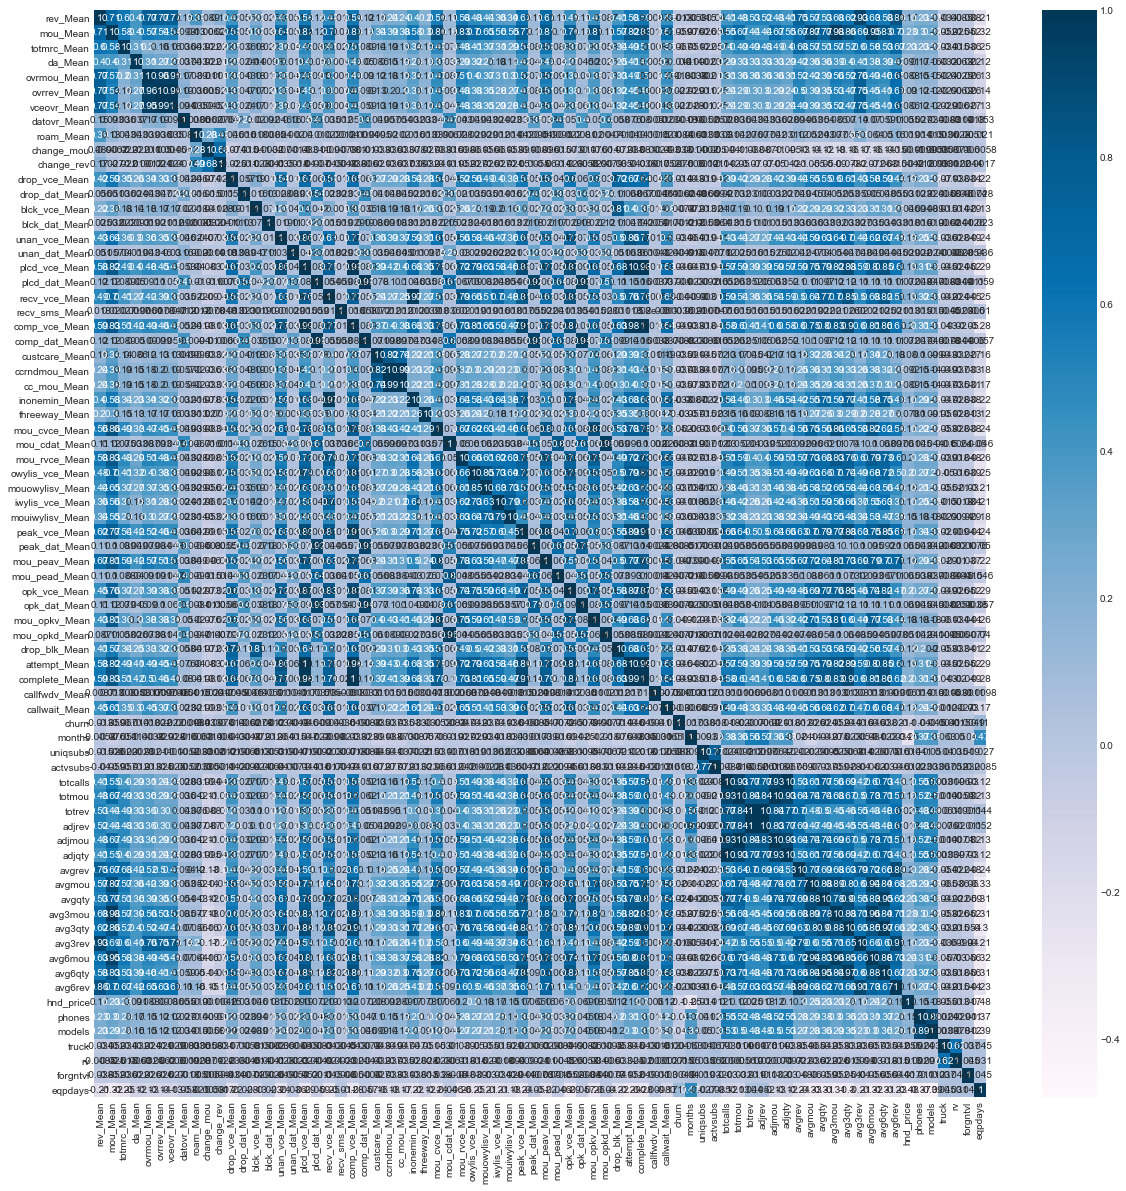

In [47]:
cor = df_nn.corr()
plt.figure(figsize=(20,20))

sns.heatmap(cor,annot=True,cmap=plt.cm.PuBu)
plt.show()

In [43]:
# To subset
cor_target = abs(cor["churn"])

# selecting highly correlated features as potential features to eliminate
corr_features = cor_target[cor_target>0.05]

# Collect the names of the features
names = [index for index, value in corr_features.iteritems()] # Drop the target variable from the results
names.remove('churn')
# Display the results
names

rev_Mean       0.010883
mou_Mean       0.057027
totmrc_Mean    0.068558
da_Mean        0.013551
ovrmou_Mean    0.019720
                 ...   
truck          0.004097
rv             0.000489
forgntvl       0.004986
eqpdays        0.112691
churn          1.000000
Name: churn, Length: 66, dtype: float64


['mou_Mean',
 'totmrc_Mean',
 'comp_vce_Mean',
 'mou_cvce_Mean',
 'complete_Mean',
 'hnd_price',
 'eqpdays']

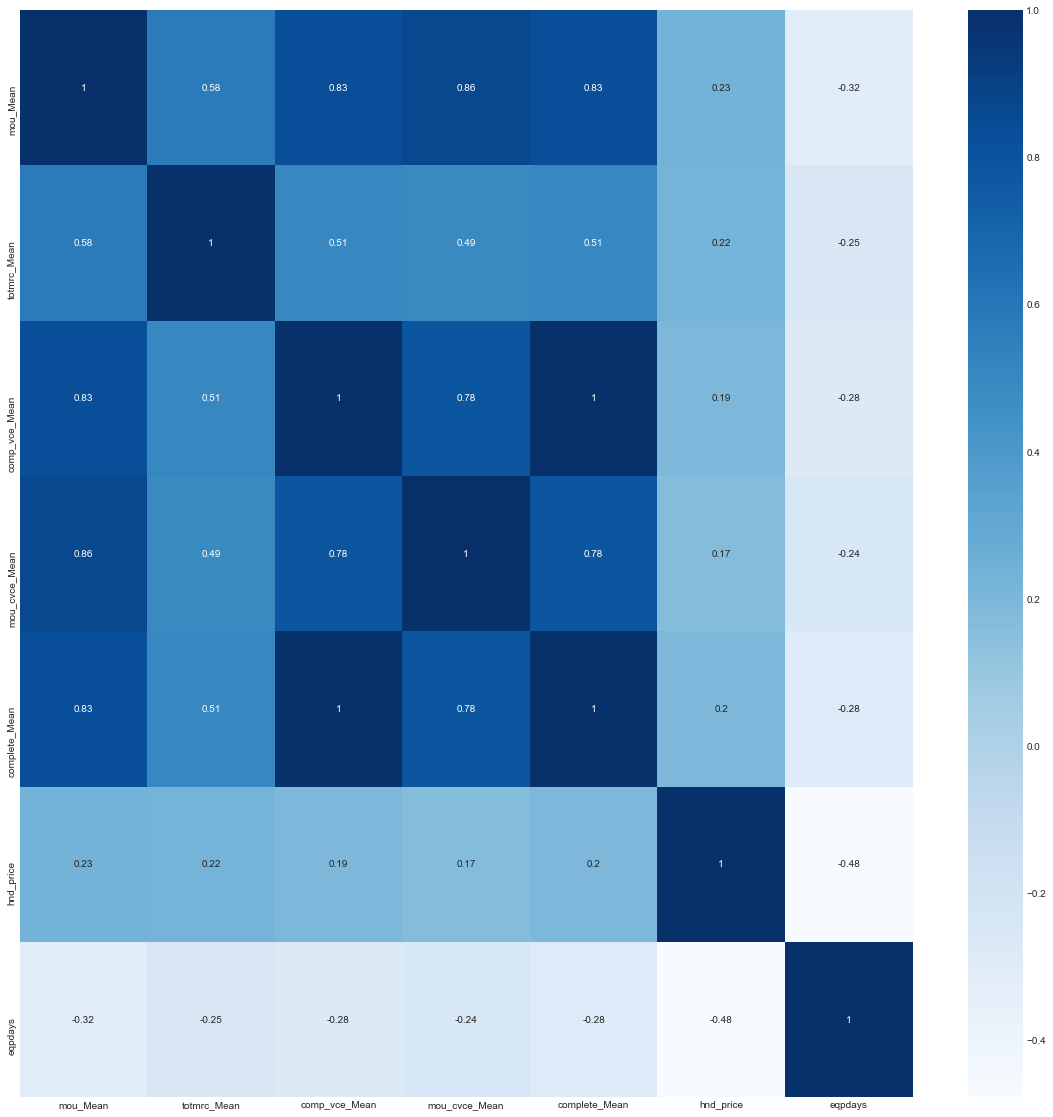

In [42]:
 # Set figure size
plt.figure(figsize=(20,20))
# Calculate the correlation matrix for target relevant features that you␣ 􏰀→previously determined
new_corr = df[names].corr()
# Visualize the correlation matrix
sns.heatmap(new_corr, annot=True, cmap=plt.cm.Blues)
plt.show()

## Exploring individual Features

### **Feature: Churn**

Description: Instance of churn between 31-60 days after observation date

The classes are split 50/50 which means we won't be dealing with imbalance classes problems

0    44141
1    43420
Name: churn, dtype: int64


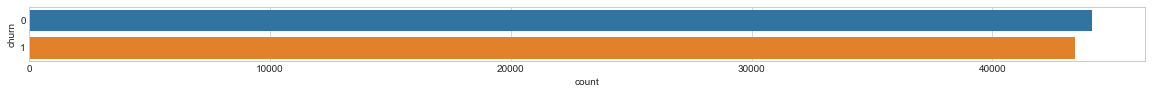

In [48]:
# How many people churn?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='churn', data=df_nn)
print(df_nn['churn'].value_counts())

### **Feature: 

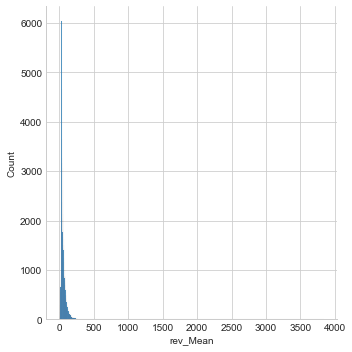

In [50]:
sns.displot(df_nn['rev_Mean'])
